In [2]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Suyas\OneDrive\Desktop\aws\Yoroi prep\capacity_analysis\nuclear_capacity_cleaned.csv') #reading csv data#

In [4]:
df['outage_flag'] = (df['capacity_factor'] < 75).astype(int) #makes new column outageflag measuring performance dip. takes capacity factor if below 75 and returns boolean as int#

In [5]:
df[['date', 'capacity_factor', 'outage_flag']].head(15)


,date,capacity_factor,outage_flag
0,1994-12-01,82.0,0
1,1995-01-01,85.9,0
2,1995-02-01,77.8,0
3,1995-03-01,70.3,1
4,1995-04-01,69.2,1
5,1995-05-01,73.7,1
6,1995-06-01,79.0,0
7,1995-07-01,83.8,0
8,1995-08-01,83.3,0
9,1995-09-01,77.7,0


In [6]:
df['cf_last_month'] = df['capacity_factor'].shift(1) #grabs values from (n) months ago#
df['cf_2_months_ago'] = df['capacity_factor'].shift(2) #spotting performance decline patterns#


In [7]:
df[['date', 'capacity_factor', 'cf_last_month']].head(10)


,date,capacity_factor,cf_last_month
0,1994-12-01,82.0,NaN
1,1995-01-01,85.9,82.0
2,1995-02-01,77.8,85.9
3,1995-03-01,70.3,77.8
4,1995-04-01,69.2,70.3
5,1995-05-01,73.7,69.2
6,1995-06-01,79.0,73.7
7,1995-07-01,83.8,79.0
8,1995-08-01,83.3,83.8
9,1995-09-01,77.7,83.3


In [8]:
df['cf_2_months_ago'] = df['capacity_factor'].shift(2)
df[['date', 'capacity_factor', 'cf_2_months_ago']].head(10)


,date,capacity_factor,cf_2_months_ago
0,1994-12-01,82.0,NaN
1,1995-01-01,85.9,NaN
2,1995-02-01,77.8,82.0
3,1995-03-01,70.3,85.9
4,1995-04-01,69.2,77.8
5,1995-05-01,73.7,70.3
6,1995-06-01,79.0,69.2
7,1995-07-01,83.8,73.7
8,1995-08-01,83.3,79.0
9,1995-09-01,77.7,83.8


In [9]:
df['cf_rolling_3m'] = df['capacity_factor'].rolling(window=3).mean() #displays rolling 3-month average#
df[['date', 'capacity_factor', 'cf_rolling_3m']].head(10)


,date,capacity_factor,cf_rolling_3m
0,1994-12-01,82.0,NaN
1,1995-01-01,85.9,NaN
2,1995-02-01,77.8,81.900000
3,1995-03-01,70.3,78.000000
4,1995-04-01,69.2,72.433333
5,1995-05-01,73.7,71.066667
6,1995-06-01,79.0,73.966667
7,1995-07-01,83.8,78.833333
8,1995-08-01,83.3,82.033333
9,1995-09-01,77.7,81.600000


In [10]:
df['cf_volatility_3m'] = df['capacity_factor'].rolling(window=3).std() #using standard deviation to measure volatility#
df[['date', 'capacity_factor', 'cf_volatility_3m']].head(10)


,date,capacity_factor,cf_volatility_3m
0,1994-12-01,82.0,NaN
1,1995-01-01,85.9,NaN
2,1995-02-01,77.8,4.050926
3,1995-03-01,70.3,7.801923
4,1995-04-01,69.2,4.680100
5,1995-05-01,73.7,2.345918
6,1995-06-01,79.0,4.905439
7,1995-07-01,83.8,5.052062
8,1995-08-01,83.3,2.638813
9,1995-09-01,77.7,3.386739


In [12]:
df['date'].head()
print(df['date'].dtype)


object


In [13]:
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['month_num'] = df['Month'].map(month_map)
df['date'] = pd.to_datetime(dict(year=df['Year'], month=df['month_num'], day=1))


In [14]:
df['month_num'] = df['date'].dt.month
df[['date', 'month_num']].head(12)


,date,month_num
0,1994-12-01,12
1,1995-01-01,1
2,1995-02-01,2
3,1995-03-01,3
4,1995-04-01,4
5,1995-05-01,5
6,1995-06-01,6
7,1995-07-01,7
8,1995-08-01,8
9,1995-09-01,9


In [15]:
from sklearn.model_selection import train_test_split  #splitting data into training and testings sets#

features = ['cf_last_month', 'cf_2_months_ago', 'cf_rolling_3m',
            'cf_volatility_3m', 'month_num']

X = df[features].dropna()
y = df.loc[X.index, 'outage_flag']  # Align y with cleaned X

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
y_pred = model.predict(X_test)


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00         5

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



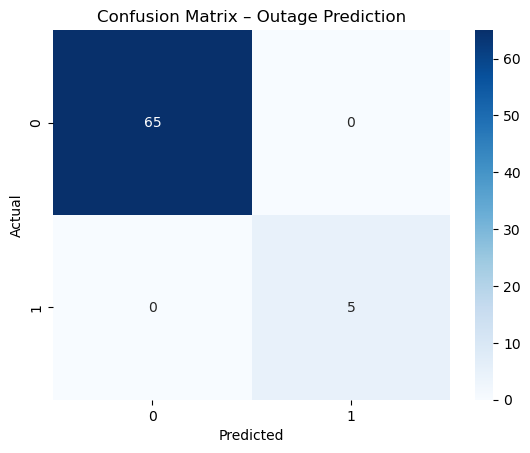

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Outage Prediction')
plt.show()


In [21]:
from pathlib import Path
import shutil

# Define source and destination paths using Path objects
source_path = Path('nuclear_modeling.ipynb')
target_folder = Path(r'C:\Users\Suyas\OneDrive\Desktop\aws\Yoroi prep\capacity_analysis')
target_path = target_folder / 'nuclear_modeling.ipynb'

# Ensure the destination folder exists
target_folder.mkdir(parents=True, exist_ok=True)

# Copy the notebook to the new location
shutil.copy(source_path, target_path)


WindowsPath('C:/Users/Suyas/OneDrive/Desktop/aws/Yoroi prep/capacity_analysis/nuclear_modeling')